In [ ]:
!pip install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 956.5 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tldextract
import xgboost as xgb
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc
import plotly.express as px
import seaborn as sns

# Random Forest Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.model_selection import KFold, cross_val_score


Code Cell 1

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Cybersecurity Poject/combined_data.csv") #Reading the Dataset that was converted to csv from local env Jupyter Notebook

<ipython-input-3-384e935b6e52>:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Cybersecurity Poject/combined_data.csv") #Reading the Dataset that was converted to csv from local env Jupyter Notebook


In [ ]:
df.head() #Looking at the loaded dataset

,Unnamed: 0,exif_signatures,file_size,pdfid_signatures,pypdf_uris,regex_uris,regex_urls,scripts,static_properties,yara_signatures,...,yara_signatures_IsSuspicious,yara_signatures_Big_Numbers2,yara_signatures_FlateDecode_wrong_version,yara_signatures_invalid_trailer_structure,yara_signatures_multiple_filtering,yara_signatures_without_attachments,yara_signatures_invalid_xref_numbers,yara_signatures_JBIG2_wrong_version,yara_signatures_possible_includes_base64_packed_functions,yara_signatures_vmdetect
0,0,{},129857,{},"['https://urllie.com/2l04g4', 'https://onmybet...","['https://urllie.com/2l04g4', 'https://onmybet...","['https', 'https', 'https', 'http://www.suaopi...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",...,0,0,0,0,0,1,0,0,0,0
1,1,{},251530,{},['https://wirut.co.za/XSRYdR1H?utm_term=eia+we...,['https://wirut.co.za/XSRYdR1H?utm_term=eia+we...,"['https', 'http://chinajnbt.com/images/upload/...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",...,0,0,0,1,0,1,0,0,0,0
2,2,{},176127,{},['https://ragaz.co.za/XSRYdR1H?utm_term=abo+di...,['https://ragaz.co.za/XSRYdR1H?utm_term=abo+di...,"['https', 'https', 'http://intechsol.kz/wp-con...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",...,0,0,0,1,0,1,0,0,0,0
3,3,{},47832,{},['https://netcdn.tw/app/431946152/roblox-cheat...,['https://netcdn.tw/app/431946152/roblox-cheat...,"['https', 'https', 'https', 'https', 'https', ...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",...,0,0,0,1,0,1,0,0,0,0
4,4,{},37657,{},['https://netcdn.xyz/app/431946152/free-robux-...,['https://netcdn.xyz/app/431946152/free-robux-...,"['https', 'https']","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",...,0,0,0,1,0,1,0,0,0,0


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True) #Dropping the Unnamed Column

In [ ]:
df.shape

(9748, 70)

Trying to understand which domains occur the highest in each of the types of files.

In [ ]:
df_benign = df[df['malicious/benign']==0]  #Extracting dataset of only Benign files from the complete dataset
df_malicious = df[df['malicious/benign']==1] #Extracting dataset of only Malicious files from the complete dataset

df_benign.reset_index(inplace=True)
df_benign.drop(['index'], axis=1, inplace=True)

df_malicious.reset_index(inplace=True)
df_malicious.drop(['index'], axis=1, inplace=True)

print(len(df_benign))
print(len(df_malicious))

5002
4746


<ipython-input-7-d466764ab873>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benign.drop(['index'], axis=1, inplace=True)
<ipython-input-7-d466764ab873>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malicious.drop(['index'], axis=1, inplace=True)


Code Cell 2

In [ ]:
benign_dict = {}  # Extracting a dictionary of domain extensions and the number of times they occur in the benign file so that we can make a list of safe domain extensions.

for i in df_benign['pypdf_uris']:
  # Removing square brackets and splitting the string into a list
  url_list_benign = i.strip("[]").split(", ")

  # Removing single quotes from each URL
  url_list_benign = [url.strip("'") for url in url_list_benign]

  domain_extensions = [tldextract.extract(url).suffix for url in url_list_benign]

  for ext in domain_extensions:
    if ext not in benign_dict.keys():
      benign_dict[ext] = 0
    else:
      benign_dict[ext] += 1


In [ ]:
# Converting the dictionary to a DataFrame
benign_domain_df = pd.DataFrame(list(benign_dict.items()), columns=['Domain', 'Count'])

benign_domain_df = benign_domain_df.sort_values(by='Count', ascending=False)

print(benign_domain_df.head())

   Domain  Count
0     com  23425
2     org  14362
1           5866
5     gov   4319
42    int   4226


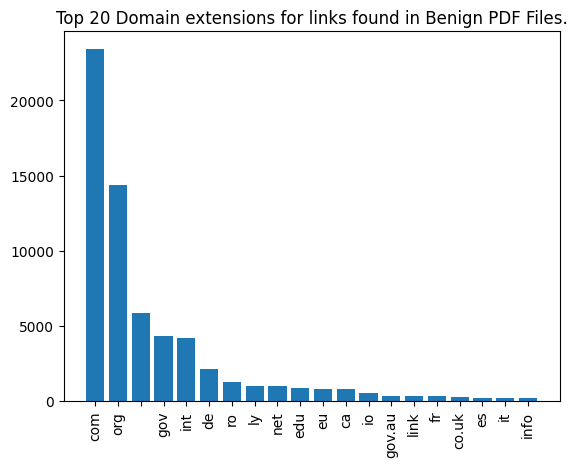

In [ ]:
plt.bar(benign_domain_df['Domain'][:20], benign_domain_df['Count'][:20])
plt.xticks(rotation = 90)
plt.title("Top 20 Domain extensions for links found in Benign PDF Files.")
plt.show()

Code Cell 3

In [ ]:
# Making a list of safe domain extensions from the above extracted information.
safe_domain_extensions = ['com','net','gov','org', 'edu', 'ca', 'us', 'de', 'uk', 'in', 'co', 'ru', ' ', 'ro', 'ly', 'io', 'co.uk', 'link' , 'fr', 'gov.au', 'info', 'it', 'es', 'eu']
sus_domain_count = []


# Adding a new feature that counts the occurence of suspicious domains in the pdf file.
for i in range(len(df['pypdf_uris'])):
  sus_domain_extensions = 0


  url_string = df['pypdf_uris'][i]
  # Removing square brackets and splitting the string into a list
  url_list = url_string.strip("[]").split(", ")

  # Removing single quotes from each URL
  url_list = [url.strip("'") for url in url_list]

  domain_extensions = [tldextract.extract(url).suffix for url in url_list]

  for ext in domain_extensions:
    if ext not in safe_domain_extensions:
      sus_domain_extensions += 1

  sus_domain_count.append(sus_domain_extensions)


# Adding the Suspicious domain count to the original dataframe
df['sus_domain_count'] = sus_domain_count
df.head()

,exif_signatures,file_size,pdfid_signatures,pypdf_uris,regex_uris,regex_urls,scripts,static_properties,yara_signatures,pypdf_uris_num,...,yara_signatures_Big_Numbers2,yara_signatures_FlateDecode_wrong_version,yara_signatures_invalid_trailer_structure,yara_signatures_multiple_filtering,yara_signatures_without_attachments,yara_signatures_invalid_xref_numbers,yara_signatures_JBIG2_wrong_version,yara_signatures_possible_includes_base64_packed_functions,yara_signatures_vmdetect,sus_domain_count
0,{},129857,{},"['https://urllie.com/2l04g4', 'https://onmybet...","['https://urllie.com/2l04g4', 'https://onmybet...","['https', 'https', 'https', 'http://www.suaopi...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",12,...,0,0,0,0,1,0,0,0,0,3
1,{},251530,{},['https://wirut.co.za/XSRYdR1H?utm_term=eia+we...,['https://wirut.co.za/XSRYdR1H?utm_term=eia+we...,"['https', 'http://chinajnbt.com/images/upload/...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",27,...,0,0,1,0,1,0,0,0,0,8
2,{},176127,{},['https://ragaz.co.za/XSRYdR1H?utm_term=abo+di...,['https://ragaz.co.za/XSRYdR1H?utm_term=abo+di...,"['https', 'https', 'http://intechsol.kz/wp-con...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",25,...,0,0,1,0,1,0,0,0,0,9
3,{},47832,{},['https://netcdn.tw/app/431946152/roblox-cheat...,['https://netcdn.tw/app/431946152/roblox-cheat...,"['https', 'https', 'https', 'https', 'https', ...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",22,...,0,0,1,0,1,0,0,0,0,22
4,{},37657,{},['https://netcdn.xyz/app/431946152/free-robux-...,['https://netcdn.xyz/app/431946152/free-robux-...,"['https', 'https']","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",2,...,0,0,1,0,1,0,0,0,0,2


In [ ]:
sus_domain_count = []


for j in range(4):
  malicious = 0
  benign = 0
  for i in range(len(df['pypdf_uris'])):
    sus_domain_extension = 0


    url_string = df['pypdf_uris'][i]
    # Removing square brackets and splitting the string into a list
    url_list = url_string.strip("[]").split(", ")

    # Removing single quotes from each URL
    url_list = [url.strip("'") for url in url_list]

    domain_extensions = [tldextract.extract(url).suffix for url in url_list]

    for ext in domain_extensions:
      if ext not in safe_domain_extensions:
        sus_domain_extension += 1

    sus_domain_count.append(sus_domain_extension)

    if sus_domain_extension > j:
      if df['malicious/benign'][i] == 1:
        malicious += 1
      else:
        benign += 1

  print(f"For threshold value of {j}")
  print(f'malicious: {malicious}')
  print(f'benign: {benign}')
  print("\n\n")

For threshold value of 0
malicious: 4219
benign: 4143



For threshold value of 1
malicious: 3840
benign: 451



For threshold value of 2
malicious: 2637
benign: 342



For threshold value of 3
malicious: 2473
benign: 268





Code Cell 4

Extracting information about Benign and Malicious Files containing links to other file attachments.


In [ ]:
df_benign['pypdf_uris'][0]

"['https://www.hsbcnet.com/-/media/hsbcnet/support/qg/gl_627.pdf', 'https://www.hsbcnet.com/-/media/hsbcnet/support/qg/gl_627.pdf', 'https://www.hsbcnet.com/-/media/hsbcnet/support/qg/gl_626.pdf']"

In [ ]:
file_attachments_count_list = []

for i in range(len(df_benign['pypdf_uris'])):
  url_string = df_benign['pypdf_uris'][i]
  # Removing square brackets and splitting the string into a list
  url_list = url_string.strip("[]").split(", ")

  # Removing single quotes from each URL
  url_list = [url.strip("'") for url in url_list]

  file_attachments_count = sum(1 for url in url_list if url.endswith('.pdf') or url.endswith('.doc') or url.endswith('.docx'))

  file_attachments_count_list.append(file_attachments_count)

df_benign['file_attachments_count'] = file_attachments_count_list

<ipython-input-14-d39ae0cbfb0d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benign['file_attachments_count'] = file_attachments_count_list


In [ ]:
benign_file_atch_series = df_benign['file_attachments_count'].describe()

benign_file_atch_series.drop("count", inplace=True)

benign_file_atch_series

mean      0.961815
std       8.887820
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max     313.000000
Name: file_attachments_count, dtype: float64

<Axes: >

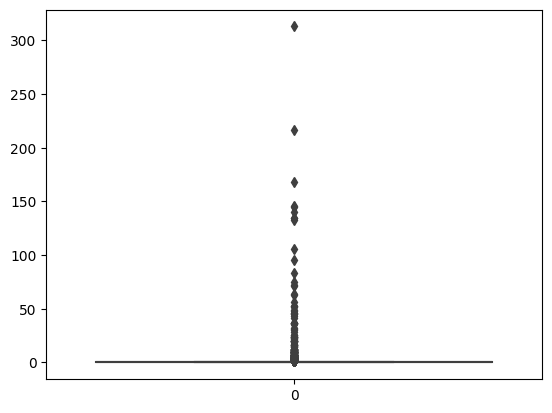

In [ ]:
sns.boxplot(df_benign['file_attachments_count'])

In [ ]:
mean = (np.mean(df_benign['file_attachments_count']))
print(mean)
sigma = (np.std(df_benign['file_attachments_count']))
print(sigma)
sigmathreshold3 = mean + (3*sigma)
print(sigmathreshold3)
print(np.where((df_benign['file_attachments_count'] > 28)))

0.9618152738904439
8.886931434602907
27.622609577699166
(array([  45,   92,  277,  416,  736,  801,  889,  958, 1077, 1125, 1201,
       1231, 1407, 1520, 1522, 1602, 1664, 1820, 1842, 1915, 2764, 2774,
       3092, 3264, 3357, 3407, 3697, 3734, 3969, 4022, 4038, 4069, 4080,
       4171, 4225, 4326, 4803, 4922]),)


df_malicious

In [ ]:
file_attachments_count_list = []

for i in range(len(df_malicious['pypdf_uris'])):
  url_string = df_malicious['pypdf_uris'][i]
  # Removing square brackets and splitting the string into a list
  url_list = url_string.strip("[]").split(", ")

  # Removing single quotes from each URL
  url_list = [url.strip("'") for url in url_list]

  file_attachments_count = sum(1 for url in url_list if url.endswith('.pdf') or url.endswith('.doc') or url.endswith('.docx'))

  file_attachments_count_list.append(file_attachments_count)

df_malicious['file_attachments_count'] = file_attachments_count_list

<ipython-input-16-1c5ef1244408>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malicious['file_attachments_count'] = file_attachments_count_list


In [ ]:
malicious_file_atch_series = df_malicious['file_attachments_count'].describe()

malicious_file_atch_series.drop("count", inplace=True)

malicious_file_atch_series

mean    15.844711
std      9.742897
min      0.000000
25%      7.000000
50%     20.000000
75%     20.000000
max     54.000000
Name: file_attachments_count, dtype: float64

Plotting the file_attachments_count description in both the benign and malicious files.

In [ ]:
# Names of the statistics
categories = list(benign_file_atch_series.index)

# Values for each type of files.
values_series_1 = list(benign_file_atch_series.values)
values_series_2 = list(malicious_file_atch_series.values)


# Adding two different bars to the chart
fig = go.Figure(data=[
    go.Bar(name='Benign', x=categories, y=values_series_1),
    go.Bar(name='Malicious', x=categories, y=values_series_2)
])

# Making a Grouped Bar Chart
fig.update_layout(barmode='group', title='Grouped Bar Chart of Descriptions of Benign and Malicious PDF Files',
                  xaxis_title='Statistical Measures', yaxis_title='Values')

fig.show()

Code Cell 5

In [ ]:
df_file_atch = pd.DataFrame()
df_file_atch['Benign'] = benign_file_atch_series
df_file_atch['Malicious'] = malicious_file_atch_series

df_file_atch

,Benign,Malicious
mean,0.961815,15.844711
std,8.887820,9.742897
min,0.000000,0.000000
25%,0.000000,7.000000
50%,0.000000,20.000000
75%,0.000000,20.000000
max,313.000000,54.000000


Adding File count to the combined dataset.

In [ ]:
file_attachments_count_list = []

for i in range(len(df['pypdf_uris'])):
  url_string = df['pypdf_uris'][i]
  # Removing square brackets and splitting the string into a list
  url_list = url_string.strip("[]").split(", ")

  # Removing single quotes from each URL
  url_list = [url.strip("'") for url in url_list]

  file_attachments_count = sum(1 for url in url_list if url.endswith('.pdf') or url.endswith('.doc') or url.endswith('.docx'))

  file_attachments_count_list.append(file_attachments_count)

df['file_attachments_count'] = file_attachments_count_list

In [ ]:
#This is a trial block, where I'm trying different types of codes

url_list = ['https://urllie.com/2l04g4', 'https://onmybet.com/upload/files/2022/05/HmXdR385htTyK9Wdxbgv_19_170a337363bf81c43005898db3ba9780_file.pdf', 'https://atennis.kz/tour/upload/files/2022/05/HdtidSe7CeqQztzijXcB_19_ec4a6aaa19eea5e6688d2aa59bcb70da_file.pdf', 'http://www.suaopiniao1.com.br//upload/files/2022/05/5GYHwxgkILOas2vwzCPh_19_ec4a6aaa19eea5e6688d2aa59bcb70da_file.pdf', 'https://social.deospace.com/upload/files/2022/05/6VDqdNZV1AFtDPn3a1Ad_19_1fc20ef71472e819a8fd63df3543ce86_file.pdf', 'https://corpersbook.com/upload/files/2022/05/J4hSIP4BP4SQDXYoYvw3_19_d9811d38796050a04042d203c8ab5a76_file.pdf', 'https://poetbook.com/upload/files/2022/05/9TLovn5dgfWDez7wefFg_19_7514d71f470dfa314bee6450c269d38e_file.pdf', 'https://tchatche.ci/upload/files/2022/05/Du5X3XIGIa5LDnX2smpM_19_a6e83c5bec52336529e7c0b8dc334c05_file.pdf', 'https://facethai.net/upload/files/2022/05/lqWZNh9XX2PdFhRBs2nR_19_170a337363bf81c43005898db3ba9780_file.pdf', 'https://www.you-nation.com/upload/files/2022/05/YBWQGoKMfMi3XmgEMyZo_19_ec4a6aaa19eea5e6688d2aa59bcb70da_file.pdf', 'https://gameurnews.fr/upload/files/2022/05/o3hN7vkZsTdrp5k4uFXa_19_7514d71f470dfa314bee6450c269d38e_file.pdf', 'http://www.tcpdf.org']

# Count the number of file attachments found in the URLs
file_attachments_count = sum(1 for url in url_list if url.endswith('.pdf') or url.endswith('.doc') or url.endswith('.docx'))

file_attachments_count

# url_list = url_string.strip("[]").split(", ")
# url_list = [url.strip("'") for url in url_list]
# domain_extensions = [tldextract.extract(url).suffix for url in url_list]
# safe_domain_extensions = ['com','net','gov','org', 'edu', 'ca', 'us', 'de', 'uk','in','co','ru']

# unsafe_domain_extensions = 0
# for ext in domain_extensions:
#   if ext not in safe_domain_extensions:
#     unsafe_domain_extensions += 1

10

In [ ]:
df.head()

,exif_signatures,file_size,pdfid_signatures,pypdf_uris,regex_uris,regex_urls,scripts,static_properties,yara_signatures,pypdf_uris_num,...,yara_signatures_FlateDecode_wrong_version,yara_signatures_invalid_trailer_structure,yara_signatures_multiple_filtering,yara_signatures_without_attachments,yara_signatures_invalid_xref_numbers,yara_signatures_JBIG2_wrong_version,yara_signatures_possible_includes_base64_packed_functions,yara_signatures_vmdetect,sus_domain_count,file_attachments_count
0,{},129857,{},"['https://urllie.com/2l04g4', 'https://onmybet...","['https://urllie.com/2l04g4', 'https://onmybet...","['https', 'https', 'https', 'http://www.suaopi...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",12,...,0,0,0,1,0,0,0,0,3,10
1,{},251530,{},['https://wirut.co.za/XSRYdR1H?utm_term=eia+we...,['https://wirut.co.za/XSRYdR1H?utm_term=eia+we...,"['https', 'http://chinajnbt.com/images/upload/...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",27,...,0,1,0,1,0,0,0,0,8,26
2,{},176127,{},['https://ragaz.co.za/XSRYdR1H?utm_term=abo+di...,['https://ragaz.co.za/XSRYdR1H?utm_term=abo+di...,"['https', 'https', 'http://intechsol.kz/wp-con...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",25,...,0,1,0,1,0,0,0,0,9,24
3,{},47832,{},['https://netcdn.tw/app/431946152/roblox-cheat...,['https://netcdn.tw/app/431946152/roblox-cheat...,"['https', 'https', 'https', 'https', 'https', ...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",22,...,0,1,0,1,0,0,0,0,22,20
4,{},37657,{},['https://netcdn.xyz/app/431946152/free-robux-...,['https://netcdn.xyz/app/431946152/free-robux-...,"['https', 'https']","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",2,...,0,1,0,1,0,0,0,0,2,0


In [ ]:
df.to_csv("new_df_csv_with_extra_features.csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Cybersecurity Poject/new_df_csv_with_extra_features.csv") #Reading the Dataset that was converted to csv from local env Jupyter Notebook

<ipython-input-24-1d16cf6e225d>:1: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True) #Dropping the Unnamed Column

Trying to understand which domains occur the highest in each of the types of files.

In [ ]:
df_benign = df[df['malicious/benign']==0]  #Extracting dataset of only Benign files from the complete dataset
df_malicious = df[df['malicious/benign']==1] #Extracting dataset of only Malicious files from the complete dataset

df_benign.reset_index(inplace=True)
df_benign.drop(['index'], axis=1, inplace=True)

df_malicious.reset_index(inplace=True)
df_malicious.drop(['index'], axis=1, inplace=True)

print(len(df_benign))
print(len(df_malicious))

5002
4746


<ipython-input-34-d466764ab873>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-d466764ab873>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Extracting information about Benign and Malicious Files containing links to other file attachments.


Code Cell 6

# Machine Learning model Training Starts here

In [ ]:
df.head()

,exif_signatures,file_size,pdfid_signatures,pypdf_uris,regex_uris,regex_urls,scripts,static_properties,yara_signatures,pypdf_uris_num,...,yara_signatures_FlateDecode_wrong_version,yara_signatures_invalid_trailer_structure,yara_signatures_multiple_filtering,yara_signatures_without_attachments,yara_signatures_invalid_xref_numbers,yara_signatures_JBIG2_wrong_version,yara_signatures_possible_includes_base64_packed_functions,yara_signatures_vmdetect,sus_domain_count,file_attachments_count
0,{},129857,{},"['https://urllie.com/2l04g4', 'https://onmybet...","['https://urllie.com/2l04g4', 'https://onmybet...","['https', 'https', 'https', 'http://www.suaopi...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",12,...,0,0,0,1,0,0,0,0,3,10
1,{},251530,{},['https://wirut.co.za/XSRYdR1H?utm_term=eia+we...,['https://wirut.co.za/XSRYdR1H?utm_term=eia+we...,"['https', 'http://chinajnbt.com/images/upload/...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",27,...,0,1,0,1,0,0,0,0,8,26
2,{},176127,{},['https://ragaz.co.za/XSRYdR1H?utm_term=abo+di...,['https://ragaz.co.za/XSRYdR1H?utm_term=abo+di...,"['https', 'https', 'http://intechsol.kz/wp-con...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",25,...,0,1,0,1,0,0,0,0,9,24
3,{},47832,{},['https://netcdn.tw/app/431946152/roblox-cheat...,['https://netcdn.tw/app/431946152/roblox-cheat...,"['https', 'https', 'https', 'https', 'https', ...","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",22,...,0,1,0,1,0,0,0,0,22,20
4,{},37657,{},['https://netcdn.xyz/app/431946152/free-robux-...,['https://netcdn.xyz/app/431946152/free-robux-...,"['https', 'https']","{'iframe': [], 'urls': []}","{'JBIG2Decode': '0', 'XML_forms': '0', 'acro_f...","['without_attachments', 'without_images', 'wit...",2,...,0,1,0,1,0,0,0,0,2,0


In [ ]:
df.columns

Index(['exif_signatures', 'file_size', 'pdfid_signatures', 'pypdf_uris',
       'regex_uris', 'regex_urls', 'scripts', 'static_properties',
       'yara_signatures', 'pypdf_uris_num', 'regex_uris_num', 'regex_urls_num',
       'scripts_iframe', 'scripts_urls', 'static_properties_JBIG2Decode',
       'static_properties_XML_forms', 'static_properties_acro_form',
       'static_properties_auto_action', 'static_properties_colors',
       'static_properties_cross_reference_table',
       'static_properties_embedded_files', 'static_properties_file_size',
       'static_properties_java_script', 'static_properties_js',
       'static_properties_launch_action', 'static_properties_object_end',
       'static_properties_object_start', 'static_properties_object_streams',
       'static_properties_open_action', 'static_properties_page_count',
       'static_properties_rich_media',
       'static_properties_start_cross_reference_table',
       'static_properties_stream_end', 'static_properties_strea

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df_prep = df[[ 'file_size', 'pypdf_uris_num', 'regex_uris_num', 'regex_urls_num',
       'scripts_iframe', 'scripts_urls', 'static_properties_JBIG2Decode',
       'static_properties_XML_forms', 'static_properties_acro_form',
       'static_properties_auto_action', 'static_properties_colors',
       'static_properties_cross_reference_table',
       'static_properties_embedded_files',
       'static_properties_java_script', 'static_properties_js',
       'static_properties_launch_action', 'static_properties_object_end',
       'static_properties_object_start', 'static_properties_object_streams',
       'static_properties_open_action', 'static_properties_page_count',
       'static_properties_rich_media',
       'static_properties_start_cross_reference_table',
       'static_properties_stream_end', 'static_properties_stream_start',
       'static_properties_trailer_dictionary', 'malicious/benign',
       'yara_signatures_multiple_versions', 'yara_signatures_without_urls',
       'yara_signatures_PDF_Embedded_Exe',
       'yara_signatures_suspicious_creator', 'yara_signatures_without_images',
       'yara_signatures_Big_Numbers1',
       'yara_signatures_suspicious_launch_action',
       'yara_signatures_Big_Numbers0', 'yara_signatures_CRC32c_poly_Constant',
       'yara_signatures_Big_Numbers3',
       'yara_signatures_suspicious_packer_section',
       'yara_signatures_maldoc_OLE_file_magic_number',
       'yara_signatures_with_urls', 'yara_signatures_Cerberus',
       'yara_signatures_header_evasion', 'yara_signatures_with_images',
       'yara_signatures_contentis_base64', 'yara_signatures_possible_exploit',
       'yara_signatures_RSharedStrings', 'yara_signatures_Big_Numbers4',
       'yara_signatures_suspicious_embed', 'yara_signatures_MoleBoxv20',
       'yara_signatures_xtreme_rat', 'yara_signatures_memory_shylock',
       'yara_signatures_IsSuspicious', 'yara_signatures_Big_Numbers2',
       'yara_signatures_FlateDecode_wrong_version',
       'yara_signatures_invalid_trailer_structure',
       'yara_signatures_multiple_filtering',
       'yara_signatures_without_attachments',
       'yara_signatures_invalid_xref_numbers',
       'yara_signatures_JBIG2_wrong_version',
       'yara_signatures_possible_includes_base64_packed_functions',
       'yara_signatures_vmdetect', 'sus_domain_count',
       'file_attachments_count']]

# df_prep = df[['file_size', 'regex_uris_num', 'scripts_iframe', 'static_properties_JBIG2Decode',
#        'static_properties_acro_form',
#        'static_properties_colors',
#        'static_properties_cross_reference_table',
#        'static_properties_embedded_files', 'static_properties_js',
#        'static_properties_object_end',
#        'static_properties_object_streams',
#        'static_properties_page_count',
#        'static_properties_start_cross_reference_table', 'static_properties_stream_start',
#        'yara_signatures_memory_shylock',
#        'yara_signatures_FlateDecode_wrong_version',
#        'yara_signatures_suspicious_packer_section',
#        'yara_signatures_xtreme_rat', 'yara_signatures_multiple_versions',
#        'yara_signatures_Cerberus', 'yara_signatures_contentis_base64',
#        'yara_signatures_suspicious_launch_action',
#        'yara_signatures_maldoc_OLE_file_magic_number',
#        'yara_signatures_PDF_Embedded_Exe',
#        'yara_signatures_without_attachments', 'yara_signatures_Big_Numbers2',
#        'yara_signatures_Big_Numbers3',
#        'yara_signatures_JBIG2_wrong_version', 'malicious/benign']]

In [ ]:
df_prep.isna().sum()

file_size                                                    0
pypdf_uris_num                                               0
regex_uris_num                                               0
regex_urls_num                                               0
scripts_iframe                                               0
                                                            ..
yara_signatures_JBIG2_wrong_version                          0
yara_signatures_possible_includes_base64_packed_functions    0
yara_signatures_vmdetect                                     0
sus_domain_count                                             0
file_attachments_count                                       0
Length: 63, dtype: int64

In [ ]:
df_prep.fillna(0, inplace=True)

df_prep.isna().sum()

<ipython-input-40-d3673ff04829>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



file_size                                                    0
pypdf_uris_num                                               0
regex_uris_num                                               0
regex_urls_num                                               0
scripts_iframe                                               0
                                                            ..
yara_signatures_JBIG2_wrong_version                          0
yara_signatures_possible_includes_base64_packed_functions    0
yara_signatures_vmdetect                                     0
sus_domain_count                                             0
file_attachments_count                                       0
Length: 63, dtype: int64

In [ ]:
X = df_prep.drop(['malicious/benign'], axis=1)
y = df_prep['malicious/benign']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Code Cell 7

### XG Boost

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [ ]:
params = {
    'max_depth': 20,  # Depth of the trees
    'eta': 0.01,      # Learning rate
    'objective': 'binary:logistic',  # Change to 'reg:squarederror' for regression
    'eval_metric': 'logloss', # Evaluation metric
    'n_estimators': 100
}
epochs = 1500

In [ ]:
bst = xgb.train(params, dtrain, epochs)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[09:56:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.




In [ ]:
predictions = bst.predict(dtest)
# If it's a classification problem, convert probabilities to binary output
predictions = [1 if value > 0.5 else 0 for value in predictions]
# predictions

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.66%


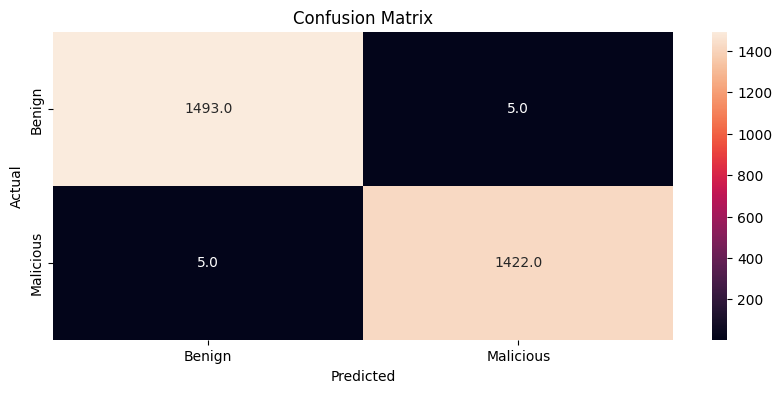

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1498
           1       1.00      1.00      1.00      1427

    accuracy                           1.00      2925
   macro avg       1.00      1.00      1.00      2925
weighted avg       1.00      1.00      1.00      2925



In [ ]:
# Displaying the confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,4))
sns.heatmap(conf_matrix, annot=True, xticklabels = ['Benign', 'Malicious'], yticklabels = ['Benign', 'Malicious'], fmt=".1f")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report: \n", classification_report(y_test, predictions))

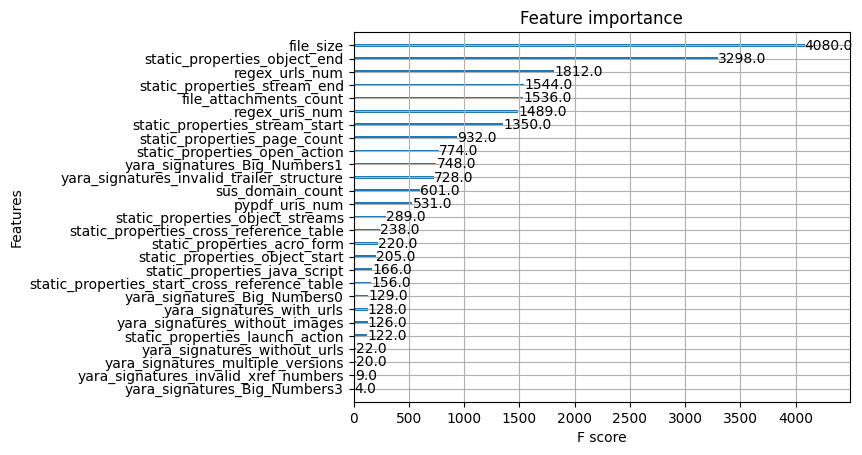

In [ ]:
importance = bst.get_score(importance_type='weight')

xgb.plot_importance(bst)
plt.show()

features = list(importance.keys())
importances = list(importance.values())

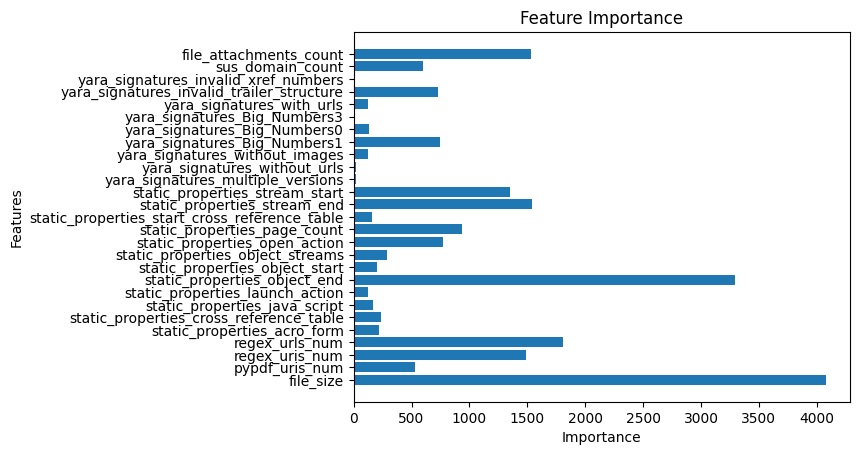

In [ ]:
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
roc_auc


0.9965791810243604

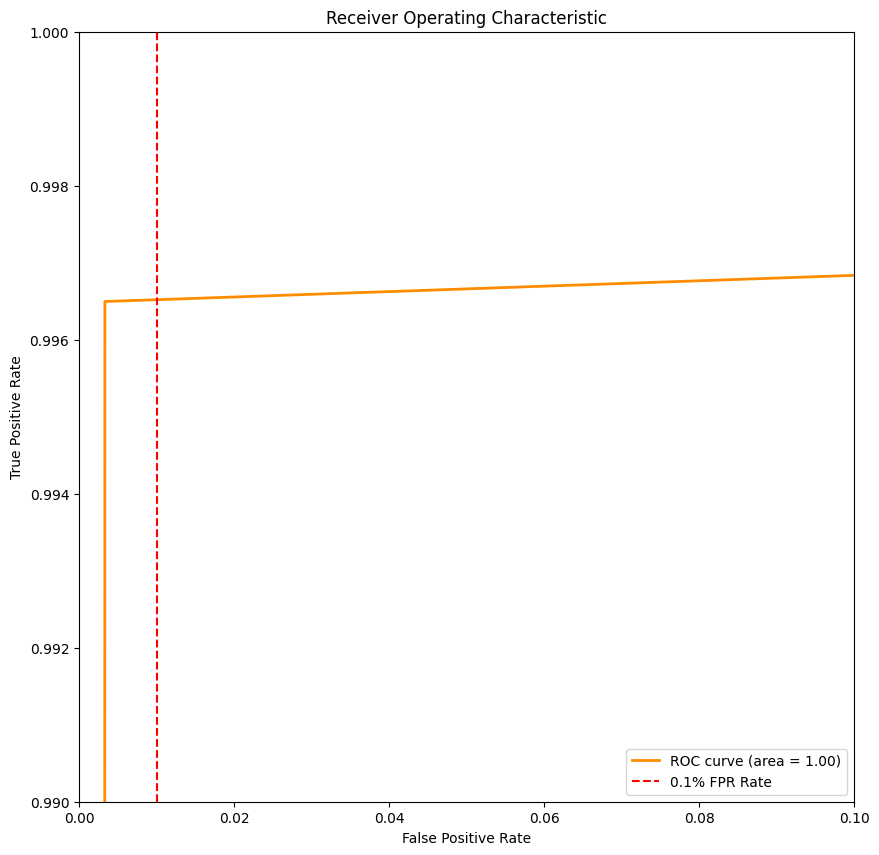

In [ ]:
plt.figure(figsize=(10,10))
plt.title("ROC Curve")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.axvline(x = 0.01, color="red", linestyle="--", label="0.1% FPR Rate")
plt.xlim([0.0, 0.1])
plt.ylim([0.99, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_pr = pd.DataFrame()

df_pr['FPR'] = fpr
df_pr['TPR'] = tpr
fig = px.line(df_pr, x="FPR", y="TPR" )
fig.show()

Cross Validation Results

In [ ]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc",
                    as_pandas=True, seed=42)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[09:56:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.




In [ ]:
print(cv_results.head())

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.995785       0.000535       0.994978      0.000791
1        0.995789       0.000540       0.994986      0.000796
2        0.995791       0.000541       0.994991      0.000793
3        0.995791       0.000541       0.994987      0.000795
4        0.996258       0.000704       0.995476      0.000649


In [ ]:
print(f"CV AUC score: {cv_results['test-auc-mean'].iloc[-1]}")
print(f"CV AUC standard deviation: {cv_results['test-auc-std'].iloc[-1]}")

CV AUC score: 0.9981263453519258
CV AUC standard deviation: 0.00026209382979192677


In [ ]:
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
xgb_model = XGBClassifier()

# Assuming X and y are your features and target
k_folds = KFold(n_splits = 4)
scores = cross_val_score(xgb_model, X, y, cv = k_folds)

In [ ]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99671728 0.99343455 0.99220353 0.99425523]
Average CV Score:  0.9941526466967583
Number of CV Scores used in Average:  4


Code Cell 8

### Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=0, n_estimators=5, max_depth=5)

In [ ]:
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)

In [ ]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.99282


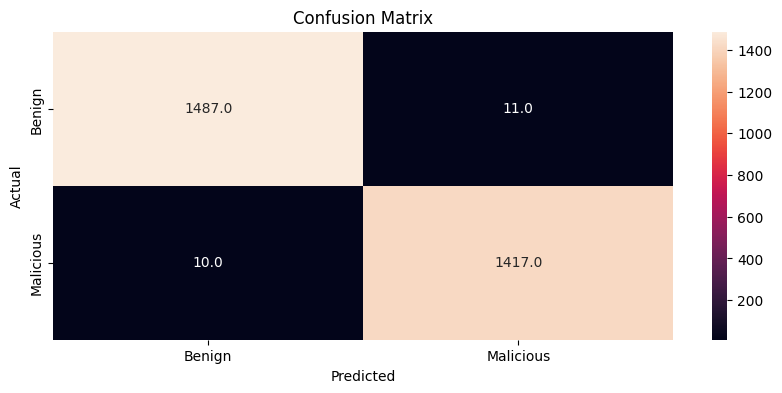

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1498
           1       0.99      0.99      0.99      1427

    accuracy                           0.99      2925
   macro avg       0.99      0.99      0.99      2925
weighted avg       0.99      0.99      0.99      2925



In [ ]:
# Displaying the confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,4))
sns.heatmap(conf_matrix, annot=True, xticklabels = ['Benign', 'Malicious'], yticklabels = ['Benign', 'Malicious'], fmt=".1f")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report: \n", classification_report(y_test, y_pred))

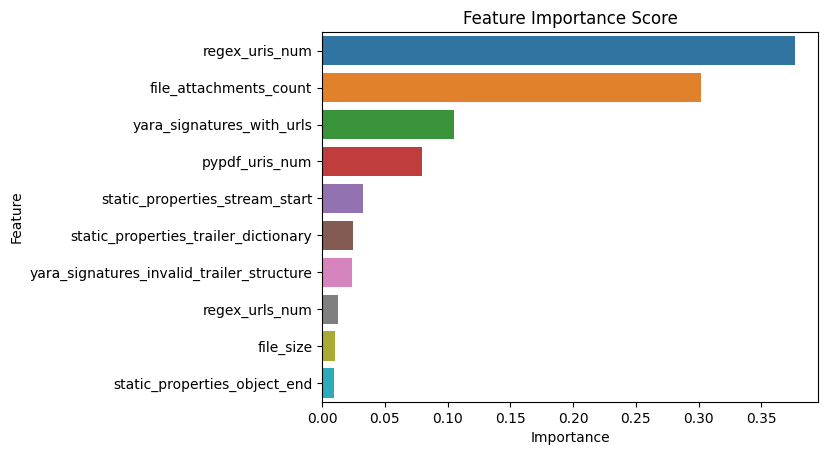

In [ ]:
feature_importance = rfc.feature_importances_

feature_names = X.columns

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x="Importance", y="Feature", data = feature_importance_df[:10])
plt.title("Feature Importance Score")
plt.show()

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9981809429624924

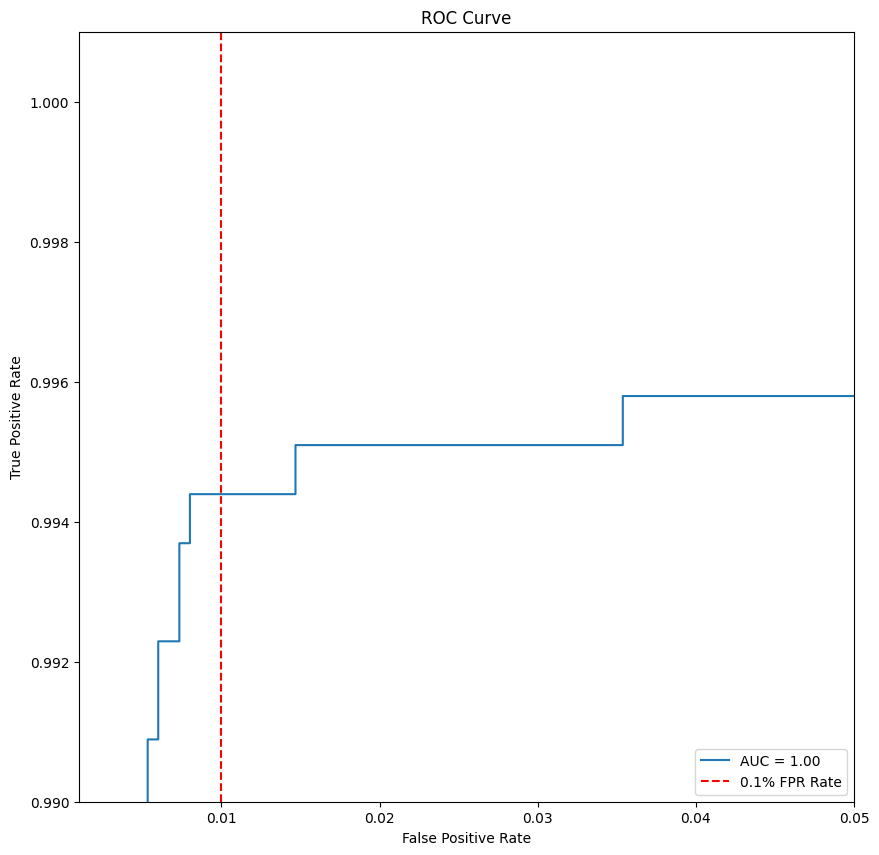

In [ ]:
plt.figure(figsize=(10,10))
plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, label = "AUC = %0.2f" %roc_auc)
plt.legend(loc="lower right")
plt.axvline(x = 0.01, color="red", linestyle="--", label="0.1% FPR Rate")
# plt.grid(color = "b", linsetyle = "--", linewidth = 0.05)
plt.xlim([0.001 ,  0.05])
plt.ylim([0.99 , 1.001])
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right")

In [ ]:
import plotly.express as px

df_pr = pd.DataFrame()

df_pr['FPR'] = false_positive_rate
df_pr['TPR'] = true_positive_rate
fig = px.line(df_pr, x="FPR", y="TPR" )
fig.show()

Cross Validation Scores

In [ ]:
scores = cross_val_score(rfc, X, y, cv=5)

In [ ]:
print("Scores for each fold:", scores)
print("Average score:", scores.mean())
print("Standard deviation:", scores.std())

Scores for each fold: [0.99128205 0.99179487 0.99435897 0.99230375 0.99127758]
Average score: 0.9922034442383338
Standard deviation: 0.00114275935391278
